In [3]:
import numpy as np
import pandas as pd

Importing 'SPAM' Dataset

In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')

<h2>Understand Your Data </h2>

In [5]:
# 1. How big is Your Data?
df.shape

(5572, 5)

In [6]:
# 2. How does the data looks like?
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
138,spam,You'll not rcv any more msgs from the chat svc...,NaN,NaN,NaN
1989,ham,The basket's gettin full so I might be by tonight,NaN,NaN,NaN
3682,ham,When did i use soc... I use it only at home......,NaN,NaN,NaN
94,ham,Havent planning to buy later. I check already ...,NaN,NaN,NaN
1868,ham,Today my system sh get ready.all is well and i...,NaN,NaN,NaN


In [7]:
# 3. What are the DataTypes consisting in the Dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# 4. How does the data looks like Mathematically?
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
# 5. Are there any Missing Values in the Dataset?
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
# 6. Are there any Duplicate Values in the Dataset?
df[['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].apply(lambda x : x.duplicated().sum())

v2             403
Unnamed: 2    5528
Unnamed: 3    5561
Unnamed: 4    5566
dtype: int64

In [11]:
# 7. What is the Correlation between the columns?(Here we could not correlate becuase columns are of string/object type)
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5419,ham,I'm at bruce &amp; fowler now but I'm in my mo...,NaN,NaN,NaN


<h2> Step 1 : Data Cleaning </h2>

In [12]:
# Removing irrelevent Columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)


In [13]:
df.sample()

,v1,v2
390,ham,Huh so late... Fr dinner?


In [14]:
# Renaming col's
df.rename(columns = {'v1':'isSpam', 'v2':'message'}, inplace = True)

In [15]:
df.sample()

,isSpam,message
3321,ham,Ok darlin i supose it was ok i just worry too ...


In [16]:
df.isnull().sum()
# No missing Values

isSpam     0
message    0
dtype: int64

In [17]:
# remove duplicates
df.duplicated().sum()
df.drop_duplicates(keep = 'first', inplace = True)

<h2> Step 2 : Feature Engineering </h2>
here we are doing it early beacuase of plotting get easy and finding correlation would be earlier 

In [18]:
# (Feature Transformation) label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['isSpam'] = encoder.fit_transform(df['isSpam'])

In [19]:
df.sample(5)

,isSpam,message
3286,0,The gas station is like a block away from my h...
4731,0,Wat time r Ì_ going to xin's hostel?
2005,0,Can't take any major roles in community outrea...
433,0,Booked ticket for pongal?
2557,1,This message is brought to you by GMW Ltd. and...


In [20]:
import nltk
'''Natural Langauge Toolkit : suite of text processing libraries for classification, tokenization, stemming,
tagging, parsing, and semantic reasoning to work with human language data'''
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\sanket
[nltk_data]     kolte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Feature Construction

In [22]:
df['num_char'] = df['message'].apply(len)
df.sample()

,isSpam,message,num_char
2436,0,Btw regarding that we should really try to see...,114


In [23]:
token = df['message'].apply(lambda x : nltk.word_tokenize(x))
print(token[0])


['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


In [24]:
df['num_word'] = df['message'].apply(lambda x : len(nltk.word_tokenize(x)))
df.sample()

,isSpam,message,num_char,num_word
369,0,"Cool, text me when you're ready",31,8


In [25]:
df['num_sentence'] = df['message'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.sample(5)

,isSpam,message,num_char,num_word,num_sentence
4747,0,The beauty of life is in next second.. which h...,133,30,3
1515,0,I wonder if you'll get this text?,33,9,1
5530,0,I think that tantrum's finished so yeah I'll b...,64,15,1
2667,0,Why de. You looking good only:-)..,34,11,2
2835,0,Nice.nice.how is it working?,28,5,1


In [26]:
# spam
df[df['isSpam']==1][['num_char', 'num_word', 'num_sentence']].describe()

,num_char,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
# Not Spam
df[df['isSpam']==0][['num_char', 'num_word', 'num_sentence']].describe()

,num_char,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<h2> Step 3 : Exploratery Data Analysis(EDA) </h2>


In [28]:
df['isSpam'].value_counts()
# imbalaced Dataset

isSpam
0    4516
1     653
Name: count, dtype: int64

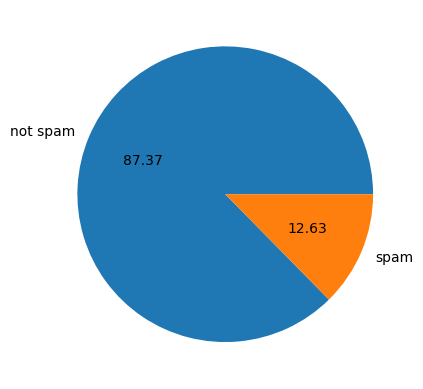

In [29]:
# pie chart
import matplotlib.pyplot as plt

plt.pie(df['isSpam'].value_counts(), labels =['not spam', 'spam'], autopct = '%0.2f')
plt.show()

<Axes: xlabel='num_char', ylabel='Count'>

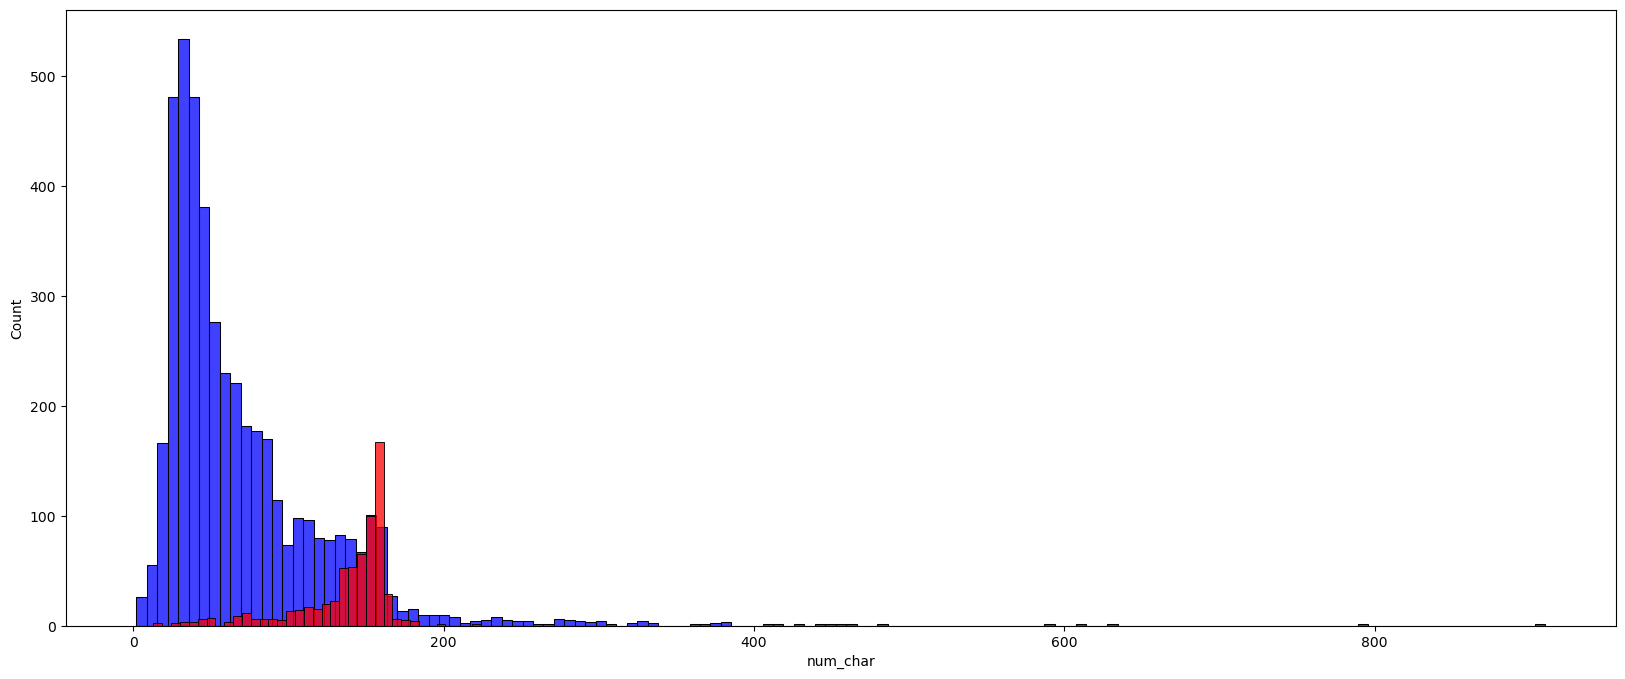

In [30]:
import seaborn as sns

# hist plot
plt.figure(figsize = (20,8))
sns.histplot(df[df['isSpam']==0]['num_char'], color = 'blue')
sns.histplot(df[df['isSpam']==1]['num_char'], color = 'red')

<Axes: xlabel='num_word', ylabel='Count'>

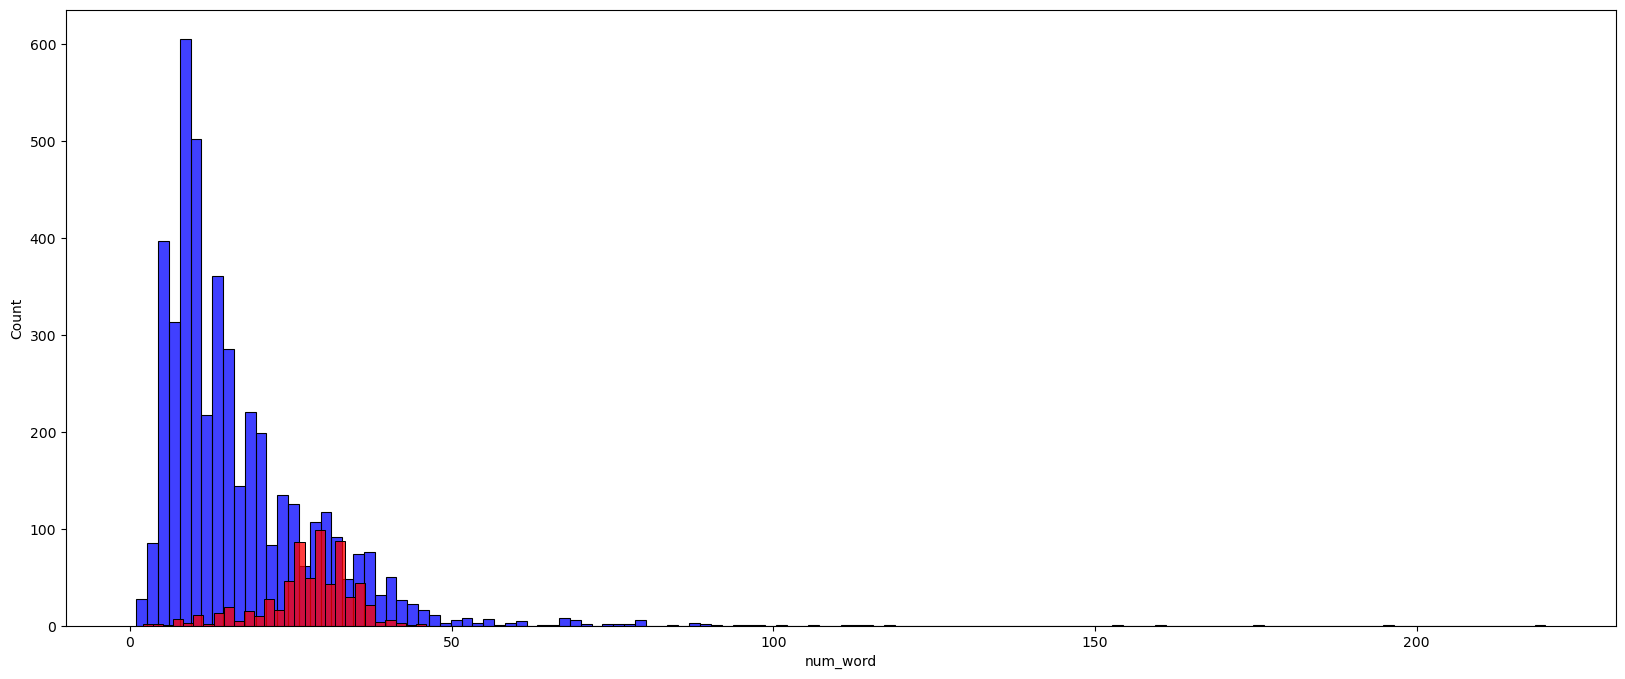

In [31]:
plt.figure(figsize = (20,8))
sns.histplot(df[df['isSpam']==0]['num_word'], color = 'blue')
sns.histplot(df[df['isSpam']==1]['num_word'], color = 'red')

<Axes: xlabel='num_sentence', ylabel='Count'>

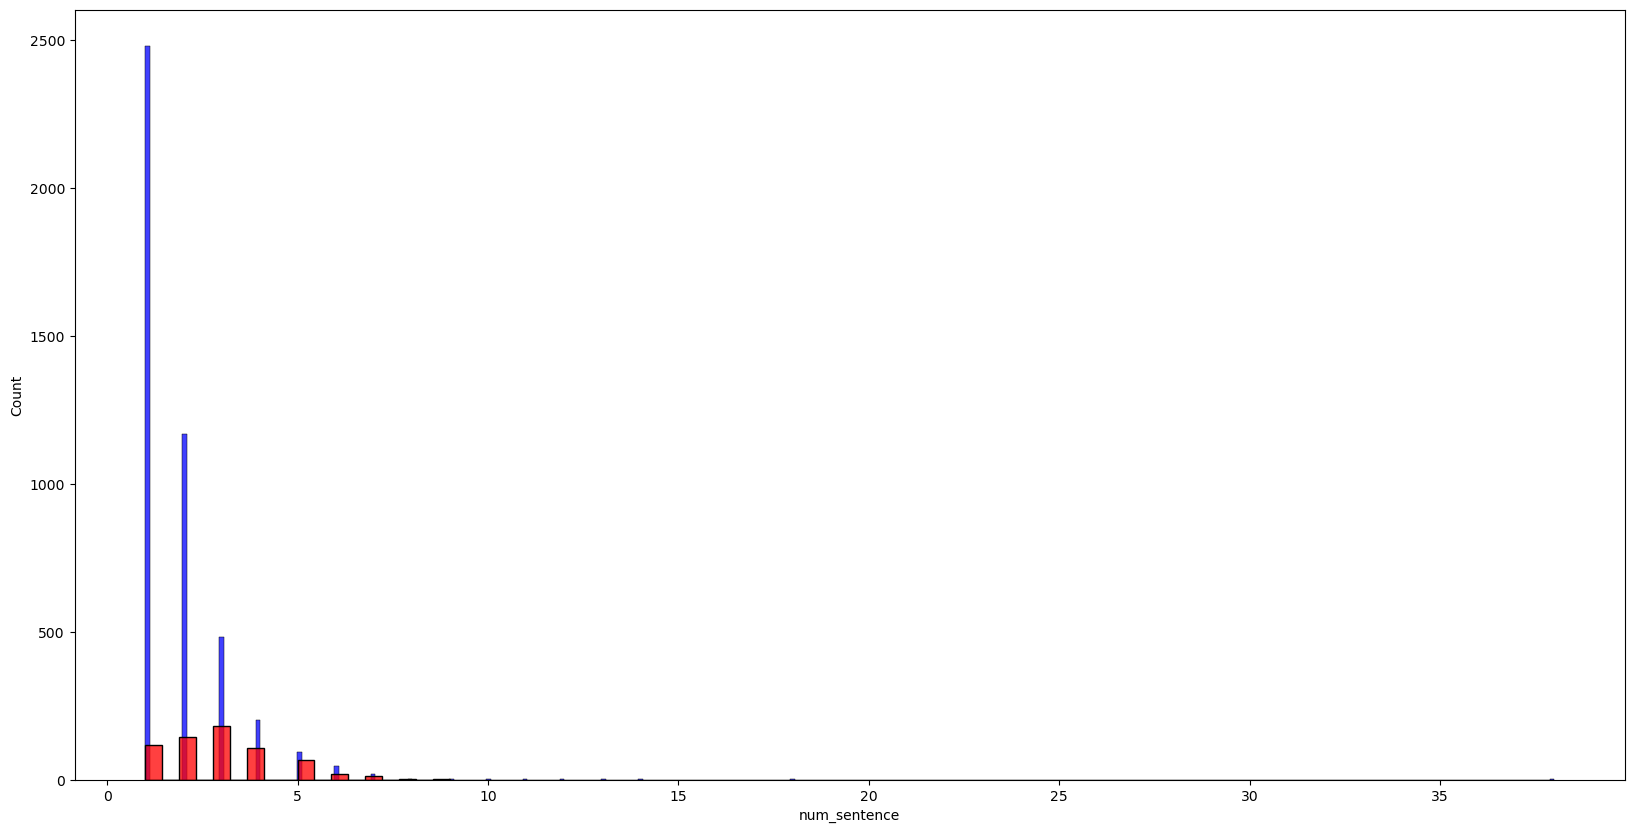

In [32]:
plt.figure(figsize = (20,10))
sns.histplot(df[df['isSpam']==0]['num_sentence'], color = 'blue')
sns.histplot(df[df['isSpam']==1]['num_sentence'], color = 'red')

C:\Users\sanket kolte\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

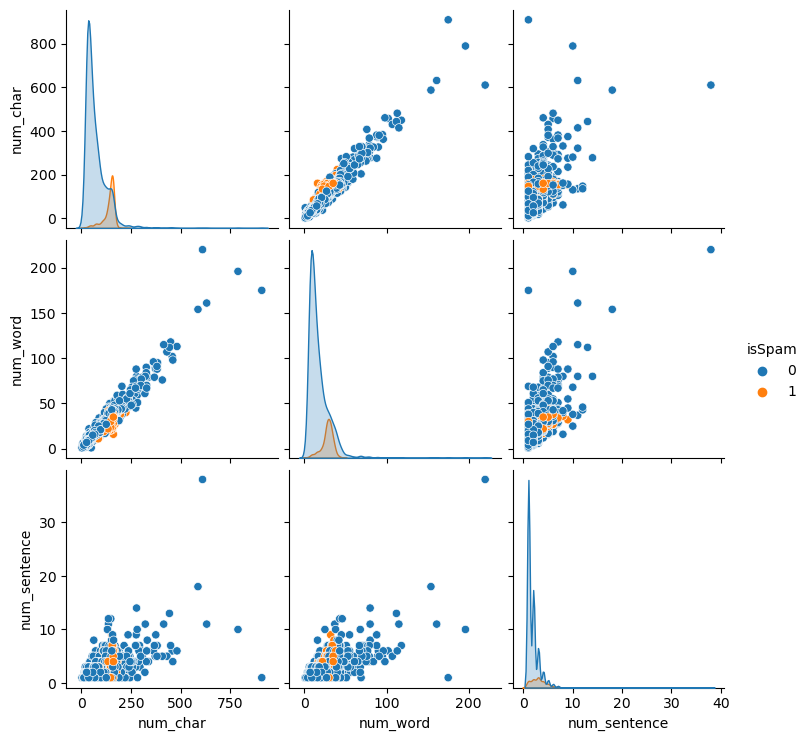

In [33]:
# Pair Plot
plt.figure(figsize = (20, 8))
sns.pairplot(df, hue = 'isSpam')

<Axes: >

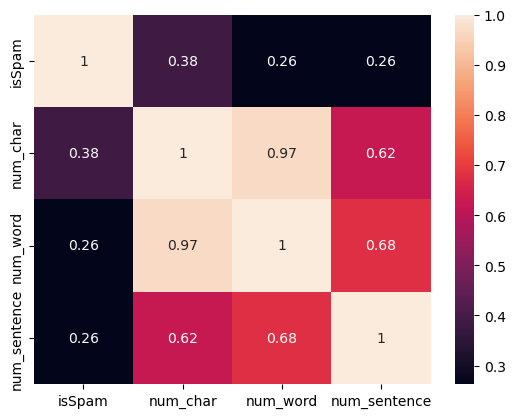

In [34]:
# heat Map
sns.heatmap(df[['isSpam', 'num_char', 'num_word', 'num_sentence']].corr(), annot = True)

<h2> Step 4 : Text/Data Preprocessing </h2>

<p style = "color:darkorange">1.Lower Case</p>
<p style = "color:darkorange">2.Tokenize</p>
<p style = "color:darkorange">3.Removing Special Characters</p>
<p style = "color:darkorange">4.Removing Stopwords and Punctuations</p>
<p style = "color:darkorange">5.Stemming</p>

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sanket
[nltk_data]     kolte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#string.punctuation i.e [!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']
#stopwords.words('english')[:10] i.e ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
#ps.stem('dancing') i.e danc


In [37]:
def text_processing(text):
    # Converting text to Lower Case
    text = text.lower()
    
    # Tokenize i.e breaking down a string into words
    text = list(nltk.word_tokenize(text))
    temp = []
    
    #Removing Special Characters, stopwords and punctuations
    for word in text:
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            temp.append(word)
    text = temp[:]
    temp.clear()
    
    #Stemming i.e bring the word into it's base form
    for word in text:
        temp.append(ps.stem(word))
        
    text = temp[:]
    return " ".join(text)
    
    

In [38]:
print(text_processing(" you hi am Sanket &hey! our  dancing !@ loving?"))

hi sanket hey danc love


In [39]:
df['transformed_message'] = df['message'].apply(text_processing)

In [40]:
df.sample(5)

,isSpam,message,num_char,num_word,num_sentence,transformed_message
3585,1,I am hot n horny and willing I live local to y...,155,33,1,hot n horni will live local text repli hear st...
2872,0,I dont understand your message.,31,6,1,dont understand messag
41,0,"Did I forget to tell you ? I want you , I need...",142,35,4,forget tell want need crave love sweet arabian...
4732,0,Good Morning my Dear Shijutta........... Have ...,75,15,1,good morn dear shijutta great amp success day
2032,0,"Yes, i'm small kid.. And boost is the secret o...",59,16,1,ye small kid boost secret energi


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')



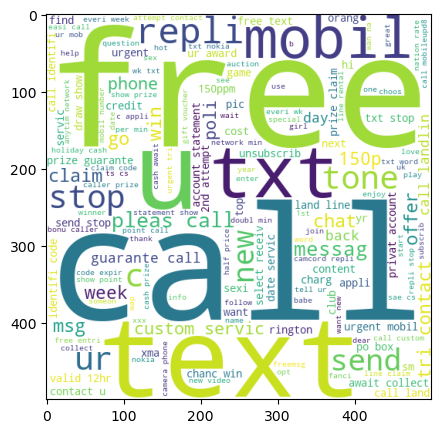

In [42]:
# for spam messages
spam_wc = wc.generate(df[df['isSpam'] == 1]['transformed_message'].str.cat(sep=" "))
plt.figure(figsize = (10,5))
plt.imshow(spam_wc)

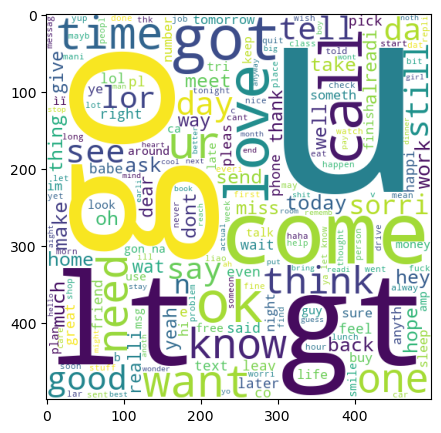

In [43]:
not_spam_wc = wc.generate(df[df['isSpam'] == 0]['transformed_message'].str.cat(sep=" "))
plt.figure(figsize = (10,5))
plt.imshow(not_spam_wc)

In [44]:
# finding out most occuring words in Spam messages
spam_corpus = list()
for msg in (df[df['isSpam']==1]['transformed_message']).tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [45]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [46]:
Spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))[0].tolist()
Spam_count = pd.DataFrame(Counter(spam_corpus).most_common(30))[1].tolist()

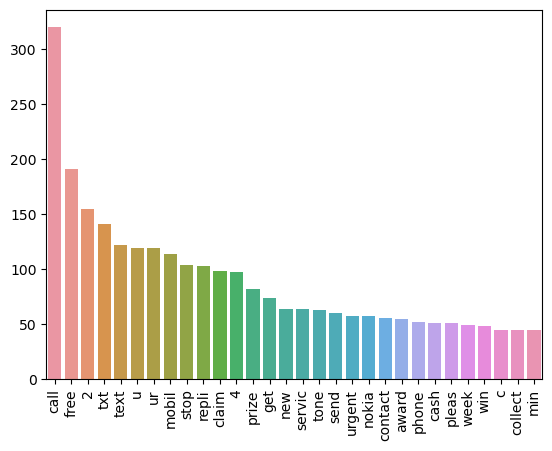

In [47]:
sns.barplot(x=Spam_words, y= Spam_count)
plt.xticks(rotation ='vertical')
plt.show()

In [48]:
# finding out most occuring words in not Spam messages
not_spam_corpus = list()
for msg in (df[df['isSpam']==0]['transformed_message']).tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [49]:
not_Spam_words = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0].tolist()
not_Spam_count = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1].tolist()

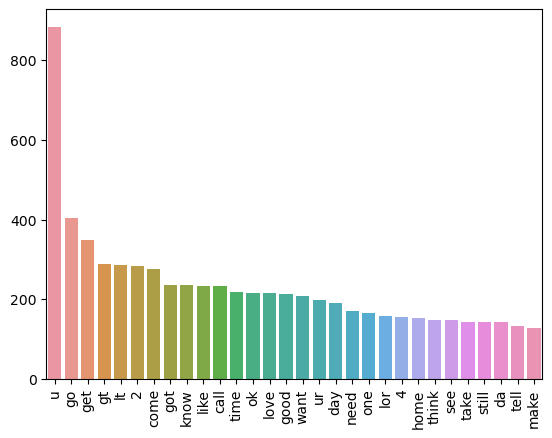

In [50]:
sns.barplot(x=not_Spam_words, y= not_Spam_count)
plt.xticks(rotation ='vertical')
plt.show()

<h2> Step 5 : Model Building </h2>

In [112]:
# before model building we got to convert our text into numbers/ vectors 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # in first step we'll use CountVectorizer and check for accuracy and precision
tfidf = TfidfVectorizer(max_features = 3000)

<h3>Note: by using count Vectorizer we are getting low precision score i.e model is predict spam but actually it is not a spam,
that is risky </h3>

 <p style ="color:brown" ; "font-size: 66px" ; "font-weight: bold">Results of Count Vectorzation Method in Naive Bayes are as Follows :</p>
     <ul>
    <li>accuracy_score gnb 0.8684719535783365 </li>
    <li>confusion matrix gnb [[772 117]
                             [[ 19 126]] </li>
    <li> precision_score gnb 0.5185185185185185 </li>
    </ul>
    <ul>
    <li>accuracy_score mnb 0.9738878143133463 </li>
    <li>confusion matrix mnb [[872  17]
                             [[10 135]] </li>
    <li> precision_score mnb 0.8881578947368421 </li>
    </ul>
    <ul>
    <li>accuracy_score of bnb 0.9661508704061895</li>
<li>confusion matrix bnb [[885   4]
 [ 31 114]]</li>
<li>precision_score bnb 0.9661016949152542 (best untill now) </li>
    </ul>

In [113]:
# trying tfidf vectorization
X = tfidf.fit_transform(df['transformed_message']).toarray()
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [114]:
y = df['isSpam'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [116]:
X_train.shape

(4135, 3000)

In [117]:
y_train.shape

(4135,)

In [118]:
# model 1 - Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [119]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [120]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('accuracy_score gnb', accuracy_score(y_test, y_pred1))
print('confusion matrix gnb', confusion_matrix(y_test, y_pred1))
print('precision_score gnb', precision_score(y_test, y_pred1))

accuracy_score gnb 0.8694390715667312
confusion matrix gnb [[788 108]
 [ 27 111]]
precision_score gnb 0.5068493150684932


In [121]:
# giving best results on prcision i.e for no entry it is predicting not spam msg as spam
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('accuracy_score of mnb', accuracy_score(y_test, y_pred2))
print('confusion matrix mnb', confusion_matrix(y_test, y_pred2))
print('precision_score mnb', precision_score(y_test, y_pred2))

accuracy_score of mnb 0.9709864603481625
confusion matrix mnb [[896   0]
 [ 30 108]]
precision_score mnb 1.0


In [122]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('accuracy_score of bnb', accuracy_score(y_test, y_pred3))
print('confusion matrix bnb', confusion_matrix(y_test, y_pred3))
print('precision_score bnb', precision_score(y_test, y_pred3))

# much better results than other 

accuracy_score of bnb 0.9835589941972921
confusion matrix bnb [[895   1]
 [ 16 122]]
precision_score bnb 0.991869918699187


In [123]:
# so we'll choose tfidf --> mnb

In [124]:
# trying out other models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [125]:
lgc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [126]:
# # clfs = {
# #     'Logestic Regression' : lgc,
# #     'Support Vector Machine' : svc,
# #     'Multinomial Naive-Bayes' : mnb,
# #     'Decision Tree' : dtc,
# #     'KNeighbors' : knc,
# #     'Random Forest' : rfc,
# #     'AdaBoost' : abc,
# #     'Bagging' : bc,
# #     'Extra Tree': etc,
# #     'XGB' : xgb
# # }

# classifiers = [lgc, svc, mnb, dtc, knc, rfc, abc, bc, etc, xgb]
# classifier_names = ['Logestic Regression', 'Support Vector Machine', 'Multinomial Naive-Bayes', 'Decision Tree', 'KNeighbors', 'Random Forest', 'AdaBoost', 'Bagging', 'Extra Tree', 'XGB']

# # clfs = dict(zip(classifier_names, classifiers))

In [128]:
classifiers =[lgc, svc, mnb, dtc, knc, rfc, abc, bc, etc, xgb]
classifier_names = ['Logestic Regression', 'Support Vector Machine', 'Multinomial Naive-Bayes', 'Decision Tree', 'KNeighbors', 'Random Forest', 'AdaBoost', 'Bagging', 'Extra Tree', 'XGB']

accuracy_scores = []
precision_scores = []

for classifier, name in zip(classifiers, classifier_names):

    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

In [93]:
# results without using tfidf(max_features) attribute

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Classifier</th>
      <th>Accuracy</th>
      <th>Precision</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>Multinomial Naive-Bayes</td>
      <td>0.959381</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>KNeighbors</td>
      <td>0.900387</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Random Forest</td>
      <td>0.971954</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Extra Tree</td>
      <td>0.972921</td>
      <td>0.982456</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Support Vector Machine</td>
      <td>0.972921</td>
      <td>0.974138</td>
    </tr>
    <tr>
      <th>6</th>
      <td>AdaBoost</td>
      <td>0.961315</td>
      <td>0.945455</td>
    </tr>
    <tr>
      <th>9</th>
      <td>XGB</td>
      <td>0.972921</td>
      <td>0.943548</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Logestic Regression</td>
      <td>0.951644</td>
      <td>0.940000</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Bagging</td>
      <td>0.958414</td>
      <td>0.862595</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Decision Tree</td>
      <td>0.936170</td>
      <td>0.846154</td>
    </tr>
  </tbody>
</table>

In [129]:
data = {
    'Classifier': classifier_names,
    'Accuracy_max_features': accuracy_scores,
    'Precision_max_features': precision_scores
}
results_df = pd.DataFrame(data)
results_df.sort_values('Precision_max_features', ascending = False)

,Classifier,Accuracy_max_features,Precision_max_features
2,Multinomial Naive-Bayes,0.970986,1.000000
4,KNeighbors,0.905222,1.000000
5,Random Forest,0.975822,0.982906
1,Support Vector Machine,0.975822,0.974790
8,Extra Tree,0.974855,0.974576
0,Logestic Regression,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,XGB,0.967118,0.926230
7,Bagging,0.958414,0.868217
3,Decision Tree,0.930368,0.836735


<h2> Model Improvement </h2>

In [ ]:
# 1. using tldf(Extra_features) attribute (results are shown above)
# 2. by using min_max scaling (accuracy decreases)
# 3. using Ensemble Learning of top 3 models in above results

In [130]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('Multinomial Naive-Bayes', mnb), ('KNeighbors', knc), ('Random Forest', rfc)], voting = 'soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Multinomial Naive-Bayes', MultinomialNB()),
                             ('KNeighbors', KNeighborsClassifier()),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [131]:
y_pred = voting.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))
# print('confusion matrix gnb', confusion_matrix(y_test, y_pred1))
print('precision', precision_score(y_test, y_pred))

# here accuracy is Decreasing

accuracy 0.9535783365570599
precision 1.0


In [132]:
# 4. using Stacking
from sklearn.ensemble import StackingClassifier
estimators = [('Multinomial Naive-Bayes', mnb), ('KNeighbors', knc), ('Random Forest', rfc)]
final_estimator = RandomForestClassifier()

In [133]:
stc = StackingClassifier(estimators = estimators, final_estimator = final_estimator)
stc.fit(X_train, y_train)
y_pred = stc.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))
# print('confusion matrix gnb', confusion_matrix(y_test, y_pred1))
print('precision', precision_score(y_test, y_pred))

accuracy 0.9709864603481625
precision 0.9029850746268657


<h2>Result:</h2>Choosing Multinomial Naive bayes as best resulting Model

In [134]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))